<a href="https://colab.research.google.com/github/ighackerbot/Amazon-clone/blob/main/Updated_EDA_Lecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Boilerplate Code - NO NEED TO UNDERSTAND (FOR NOW)
import os
import gdown

file_name = 'restaurants_all.csv'
file_path = os.path.join(os.getcwd(), file_name)

if not os.path.exists(file_path):
    url = "https://drive.google.com/uc?id=1qgMZdOpZ_KJAgqc46WW5pvG7xgkJ2jQ6"
    gdown.download(url, file_path, quiet=False)
    print(f"The file '{file_path}' has been downloaded.")
else:
    print(f"The file '{file_path}' already exists.")

import pandas as pd
df = pd.read_csv('restaurants_all.csv')
top_cities = df['city'].value_counts().index[:5]  # Top 5 cities
top_cuisines = df['cusine'].value_counts().index[:5]  # Top 5 cuisines
df['cusine_list'] = df['cusine'].apply(lambda x: x.split(',') if isinstance(x, str) else []) # str to list
cusine_exploded = df.explode('cusine_list') # explode the list (save each value as different row)
top_cusines = cusine_exploded["cusine_list"].value_counts().index[:10] # Top 10 cusines
sample_df = cusine_exploded[cusine_exploded['city'].isin(top_cities)] # only limit dataset for top-5 cities to make clean plots
sample_df = sample_df[sample_df['cusine_list'].isin(top_cuisines)] # limit dataset to top-10 cuisines
sample_df = sample_df.sample(n=1000, random_state=42)
df2 = sample_df

Downloading...
From (original): https://drive.google.com/uc?id=1qgMZdOpZ_KJAgqc46WW5pvG7xgkJ2jQ6
From (redirected): https://drive.google.com/uc?id=1qgMZdOpZ_KJAgqc46WW5pvG7xgkJ2jQ6&confirm=t&uuid=b55e7785-95fb-4105-9750-4972388f994b
To: /content/restaurants_all.csv
100%|██████████| 190M/190M [00:01<00:00, 131MB/s]


The file '/content/restaurants_all.csv' has been downloaded.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette(sns.color_palette("tab20"))

## Why Data Visualisation?

Lets see what all you know - Which all plots have you seen before or studied/used in school?

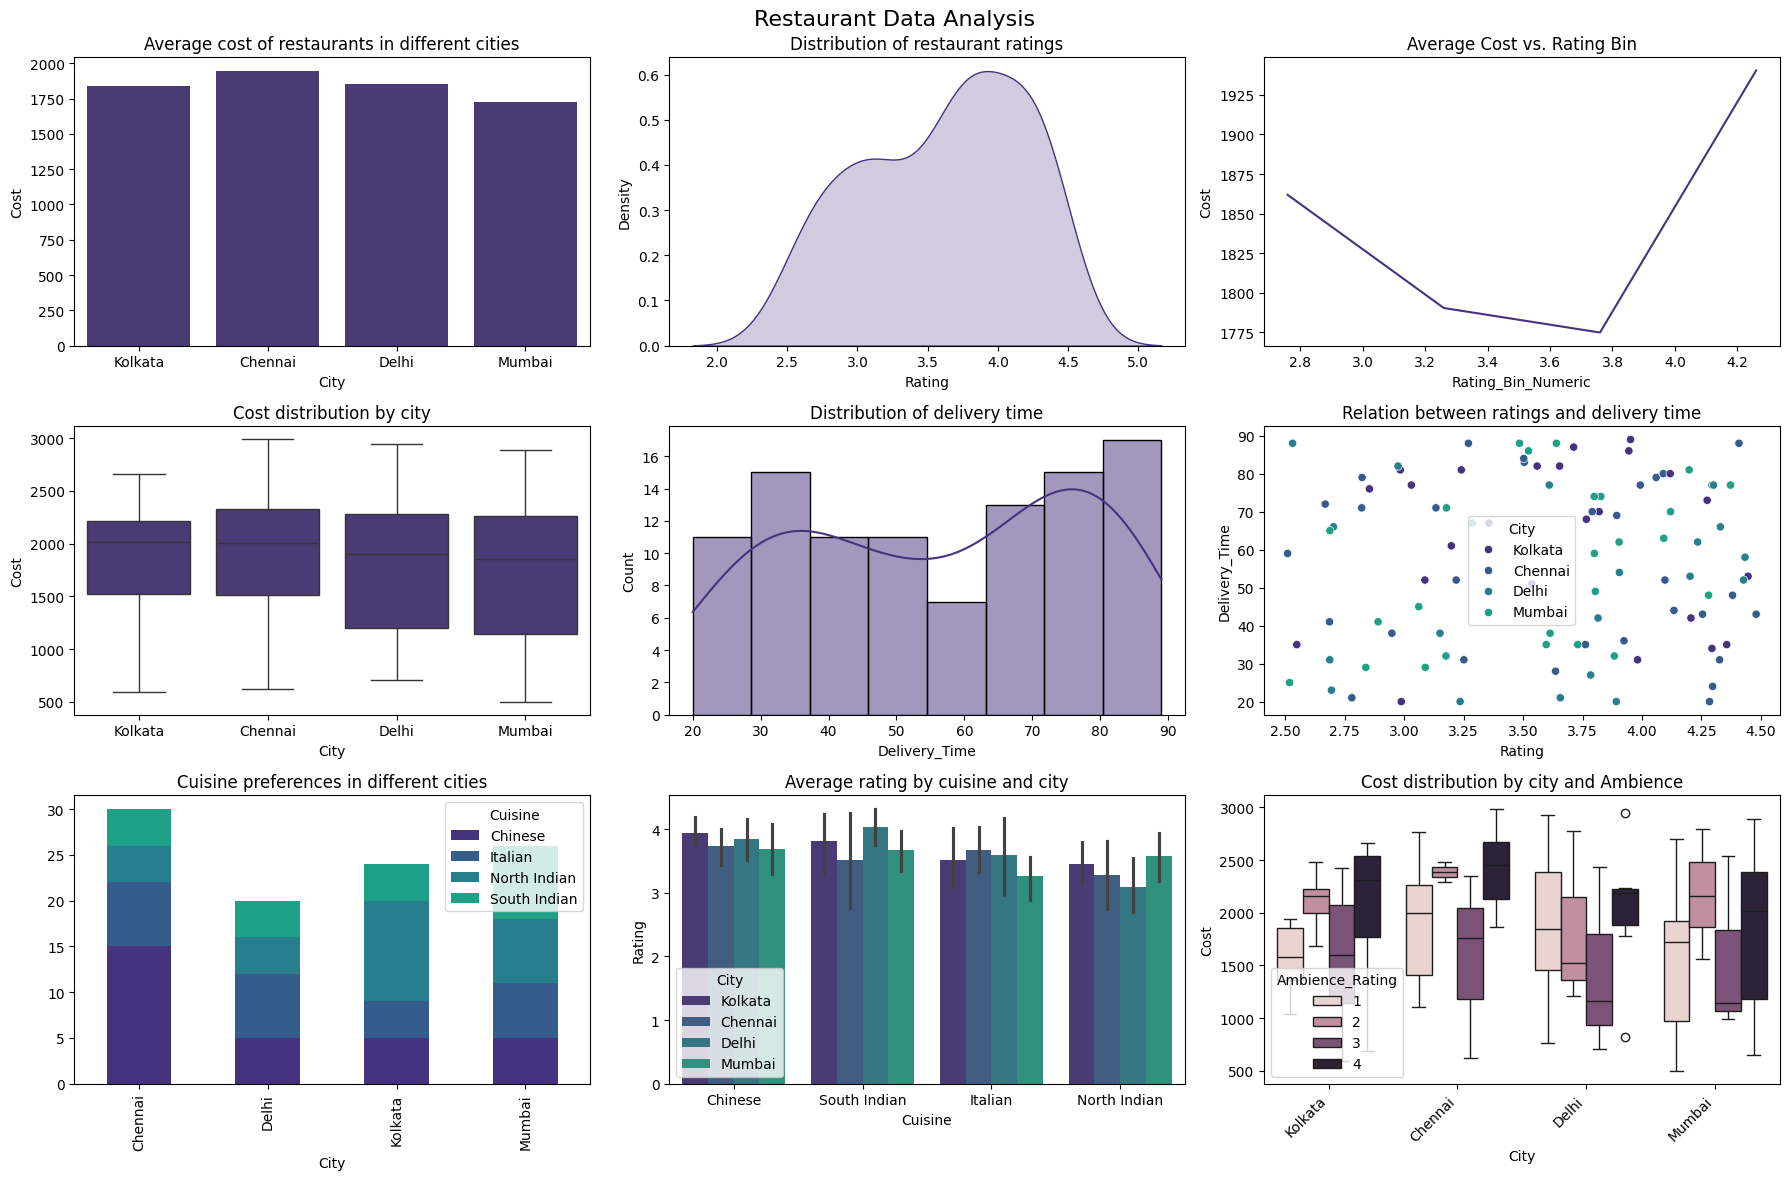

### Can’t We Just Look at the Numbers?
Before we start plotting, let's ask:  

- If you have a dataset with thousands of values, can you quickly see patterns just by reading the table?

 “Would you prefer looking at a table with 1000 rows or a simple bar chart to compare restaurants?”

💡 Point to make:
➡ Numbers alone are hard to interpret. Instead of scrolling through thousands of records, we use graphs to instantly identify trends & insights.

### What Does Visualization Help With?
✅ **Quickly spot trends & patterns** – Instead of reading numbers, we can *see* the distribution.  
✅ **Identify outliers & anomalies** – A boxplot immediately highlights extreme values.  
✅ **Compare categories effectively** – A bar chart is easier to interpret than a list of counts.  
✅ **Communicate insights clearly** – A good plot makes data understandable for everyone.  

#### **Example: Restaurant Counts in Cities**  
Imagine you get a table like this:  

| City      | Number of Restaurants |
|-----------|----------------------|
| Delhi NCR | 363                  |
| Mumbai    | 228                  |
| Bengaluru | 160                  |
| Pune      | 154                  |
| Hyderabad | 95                   |

💡 Can you immediately tell which city has the most restaurants?  
📊 **A bar chart makes it obvious in seconds!**  


## Univariate Data Visualisation

Univariate Analysis: Exploring One Variable at a Time

Step 1: Ask the Right Questions

Before plotting, always check:

✅ What question am I trying to answer?

✅ How many variables are involved?

✅ What is the data type (categorical or numerical)?


### Univariate - Categorical Data

📊 **Categories = Groups or labels (e.g., city, cuisine).**

✅ **Best Plots:**

-   **Bar Plot** -- Best for showing category frequencies.
-   **Pie Chart** -- Good for proportions, but harder to compare categories.

❌ **Avoid:**

-   **Histograms & Line Plots** -- These are for numerical data!

In [ ]:
#“How many restaurants are there in each city in our dataset?”
city_counts = df2['city'].value_counts()
print(city_counts)

city
Delhi NCR    363
Mumbai       228
Bengaluru    160
Pune         154
Hyderabad     95
Name: count, dtype: int64


What kind of plot can we use to visualize this information?

       Way-1: Barplot/Count plot in seaborn (categories on x-axis, their counts on Y-axis)
       Way-2: Piechart (proporation of categories)

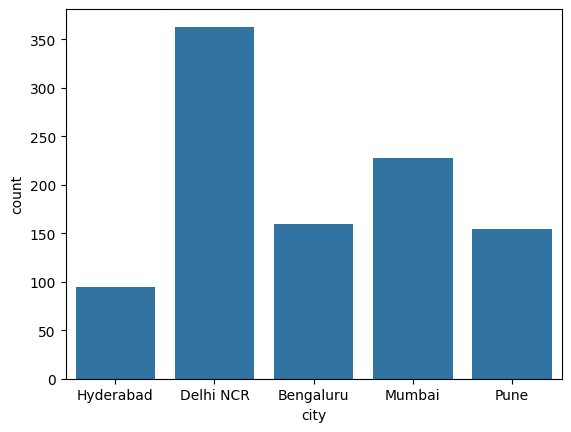

In [ ]:
sns.countplot(x='city', data=df2) # calculates counts automatically
plt.show()

What if instead of actual frequencues, we want to see the proportion of the categories?

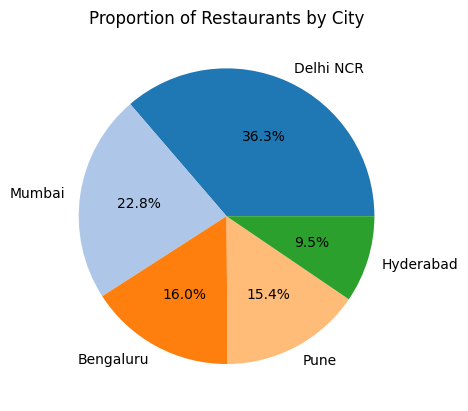

In [ ]:
city_counts.plot.pie(autopct='%1.1f%%') # seaborn doesn't suppport creating a pie-chart, not used in scientific community
plt.title('Proportion of Restaurants by City') # student learns other properties like title
plt.ylabel('')  # Remove the ylabel - first show the plot without using this
plt.show()

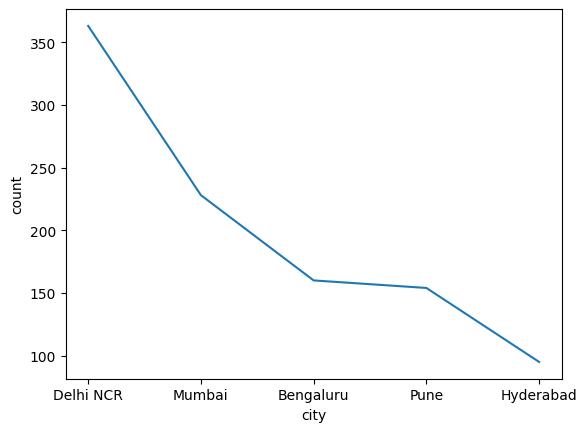

In [ ]:
sns.lineplot(data=city_counts) # bad example of plot - no relation between cities
plt.show()

### Univariate Numerical Data

📈 **Numbers = Measurable values (e.g., price, ratings).**

✅ **Best Plots:**

-   **Boxplot** -- Highlights median, quartiles, and outliers.
-   **Histogram** -- Shows how values are distributed.
-   **KDE Plot** -- A smooth version of a histogram.

 ❌ **Avoid:**

-   **Pie Chart & Bar Plot** -- These are not meant for numerical distributions.

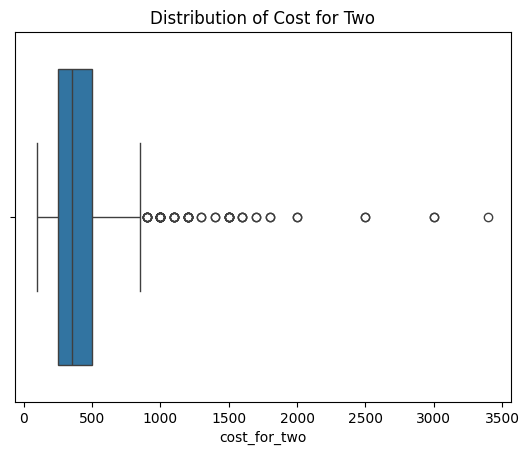

In [ ]:
# Numerical Data - Plotting the boxplot for distribution of `cost_for_two`
sns.boxplot(x='cost_for_two', data=df2)
plt.title('Distribution of Cost for Two')
plt.show()

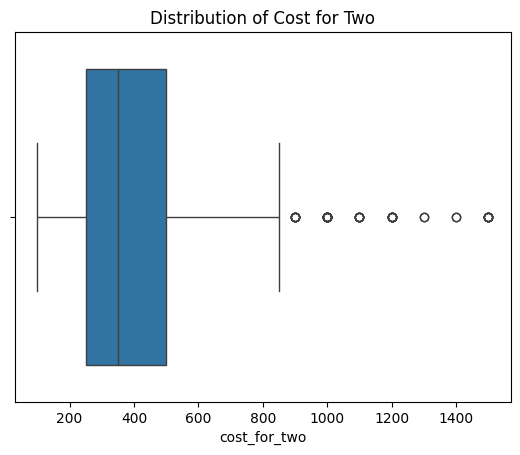

In [ ]:
# Numerical Data - Plotting the boxplot for distribution of `cost_for_two`  after removing super extreme values
sns.boxplot(x='cost_for_two', data=df2[df2["cost_for_two"] <= 1500])
plt.title('Distribution of Cost for Two')
plt.show()

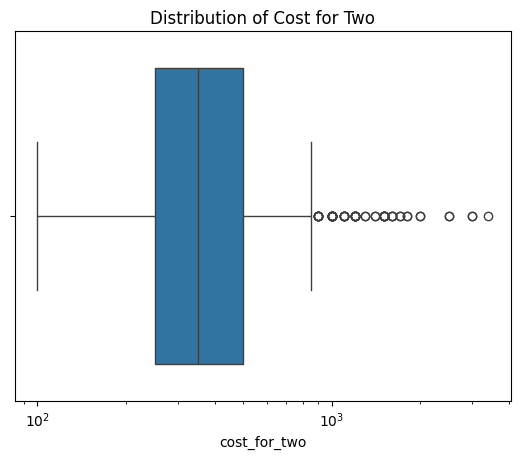

In [ ]:
# Supplementary - Feature Transformation (convert the data to log scale)
sns.boxplot(x='cost_for_two', data=df2)
plt.title('Distribution of Cost for Two')
plt.xscale('log')
plt.show()

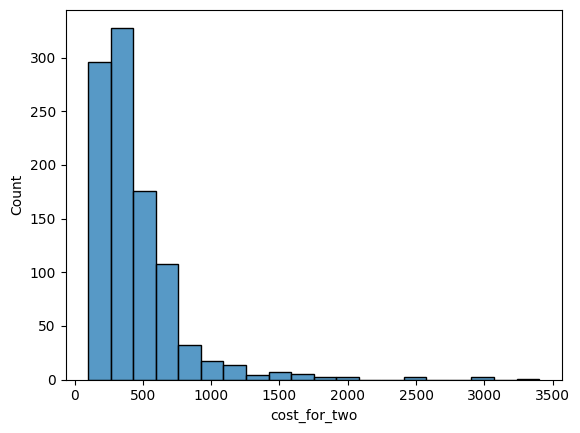

In [ ]:
# Plotting the histogram for `cost_for_two`
sns.histplot(df2['cost_for_two'], bins = 20)
plt.show()


"Are most restaurants affordable, or do high-end places dominate?"

📝 Hint: Instead of looking at averages, let's see how restaurant costs are spread.


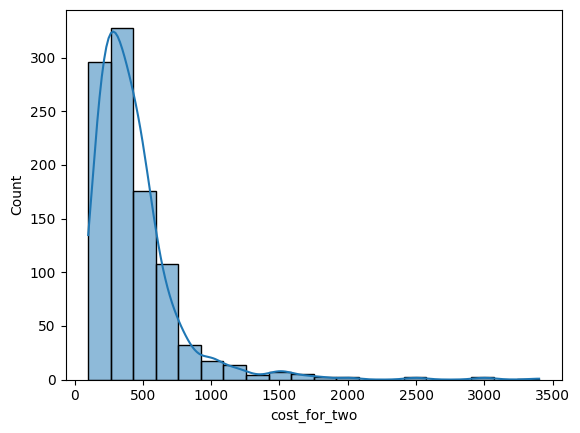

In [ ]:
# KDE - curve estimation of histogram, will discuss in later module
sns.histplot(df2['cost_for_two'], kde = True, bins = 20)
plt.show()

## Try it yourself - Make your plots more readiable and pleasing :)

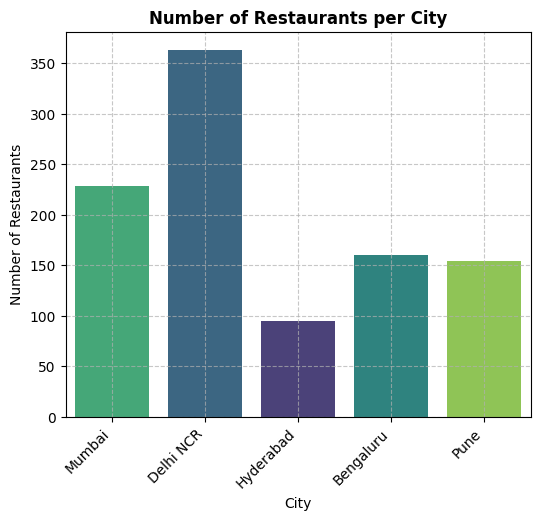

In [ ]:
# Create a barplot of the number of restaurants per city
plt.figure(figsize=(6, 5))  # Set the figure size (width=12, height=6) in inches

# Plot the barplot
sns.countplot(x='city', data=sample_df,
              order= ['Mumbai', 'Delhi NCR',  'Hyderabad', 'Bengaluru', 'Pune',],# can display bars in a specific order
              palette="viridis", hue="city") # use a softer color palatte

# # Beautification - Alternate way of selecting palette, applies to all bars
# sns.set_palette("Set3")  # Use a predefined Seaborn color palette for softer colors

# Beautification - adding a title and axis labels
plt.title('Number of Restaurants per City', fontsize=12, weight='bold')  # Title with font size and bold weight
plt.xlabel('City', fontsize=10)  # X-axis label with font size
plt.ylabel('Number of Restaurants', fontsize=10)  # Y-axis label with font size

# Beautification - rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees and align them to the right


# Beautification - adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add dashed gridlines with 70% opacity

# Show the plot
plt.show()

Is there a case when I can use Histogram for categorical data?
#"Are most restaurants rated highly, or do we see a normal spread of ratings?"

#### Create a histogram for ordinal data (rating)

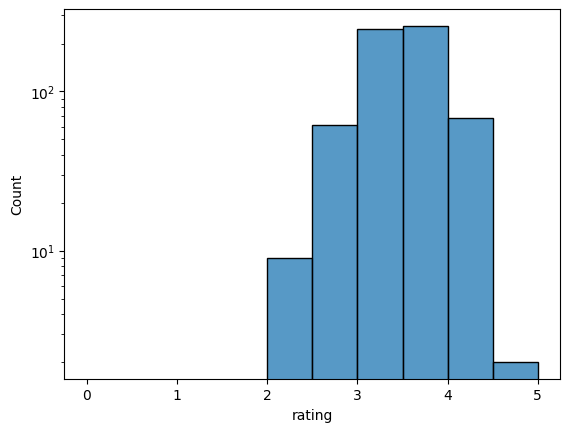

In [ ]:
sns.histplot(df2['rating'], bins = [0, 1, 2, 2.5, 3, 3.5, 4, 4.5, 5]) # pre-defined bins
plt.yscale("log") # try without using it first
plt.show()

Some questions for students to practice

**Which type of cuisine is served by the most restaurants, and how do different cuisines compare?**


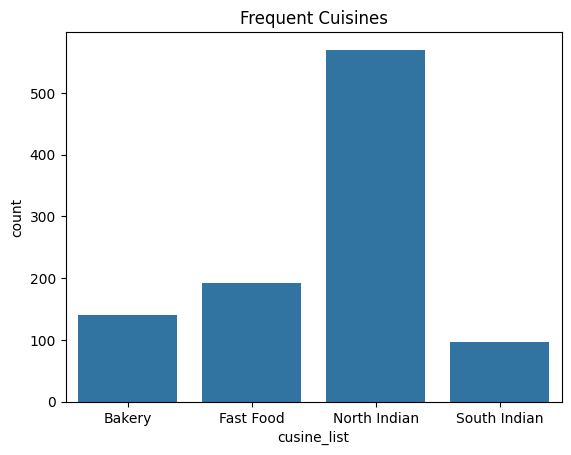

In [ ]:
sns.countplot(x=df2["cusine_list"])
plt.title("Frequent Cuisines")
plt.show()

**"Do most restaurants allow table reservations?"**

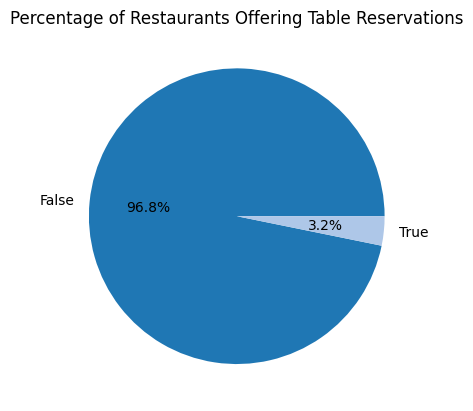

In [ ]:
df2["table_reservation"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Percentage of Restaurants Offering Table Reservations")
plt.ylabel("")  # Remove y-label for cleaner visualization
plt.show()


💡 **How spread out are restaurant ratings? Are there many poorly rated places? **




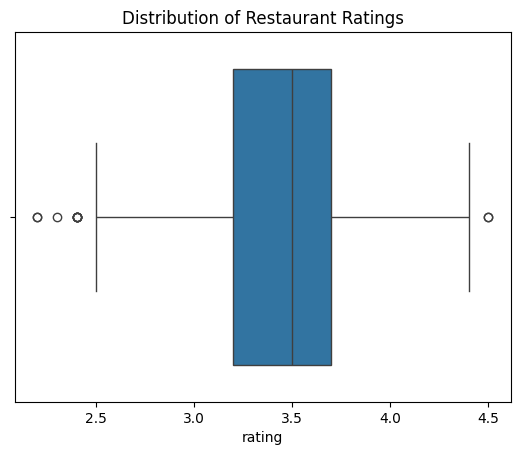

In [ ]:
sns.boxplot(x=df2["rating"],data=df2)

plt.title("Distribution of Restaurant Ratings")

plt.show()

## Bivariate Data Visualisation

**Step 1: Why Do We Need Bivariate Analysis?**  
Before plotting, always ask:  
- **What question am I trying to answer?**  
- **How many variables are involved?**  
- **What are their types? (Categorical or Numerical?)**   

**Example Questions:**  
1. Does the cost for two affect restaurant ratings?  
2. Is there a relationship between the city and the cuisine type?  
3. Do expensive restaurants get higher ratings?  

---

**Step 2: Identifying Variable Types**  
Before choosing a plot, check:  
✅ **Are both variables categorical?**  
✅ **Are both numerical?**  
✅ **Is one categorical and the other numerical?**  

| Variable 1  | Variable 2  | Suggested Plot |
|-------------|------------|----------------|
| Categorical | Categorical | Stacked Bar Plot, Grouped Bar Chart |
| Categorical | Numerical  | Boxplot, Violin Plot |
| Numerical   | Numerical  | Scatter Plot, Correlation Heatmap |


In [ ]:
sns.set_palette(sns.color_palette("viridis"))
sample_df_wo_outlier = sample_df[sample_df["cost_for_two"] <= 1500]

### **Case 1: Categorical vs. Categorical (City vs. Cuisine)**

🔹 **Question:** Does the distribution of cuisines vary by city?  





✅ **Best Plot:** Stacked or Grouped Bar Chart  

In [ ]:
# Cross-tabulation of city and cuisine (optional)
city_cuisine_table = pd.crosstab(sample_df['city'], sample_df_wo_outlier['cusine_list'])
print(city_cuisine_table)

cusine_list  Bakery  Fast Food  North Indian  South Indian
city                                                      
Bengaluru        16         33            80            27
Delhi NCR        55         55           238            13
Hyderabad        13         13            34            31
Mumbai           38         60           113            13
Pune             19         30            91            10


<ipython-input-24-6c40043723d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='city', data=sample_df_wo_outlier, palette="viridis")


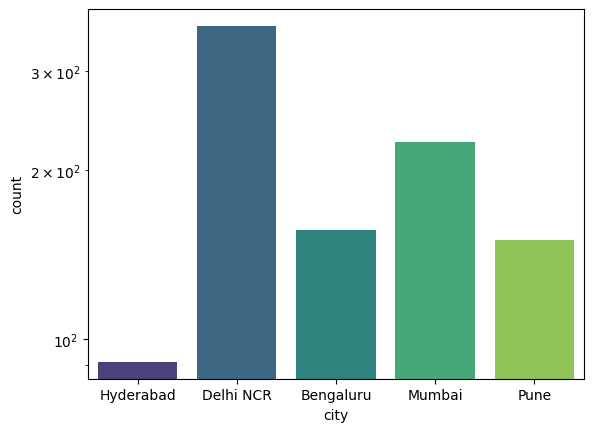

In [ ]:
sns.countplot(x='city', data=sample_df_wo_outlier, palette="viridis")
plt.yscale('log') # scaling to show less variatipn
plt.show()

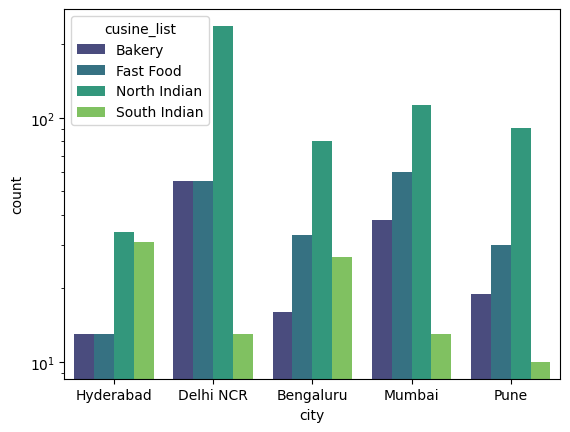

In [ ]:
sns.countplot(x='city', hue='cusine_list', data=sample_df_wo_outlier, palette="viridis")
plt.yscale('log') # scaling to show less variatipn
plt.show()

### Case-2 Categorical vs. Numerical (City vs. Cost for Two)

🔹 Question: Does the average cost for two vary by city?

✅ Best Plot: Boxplot

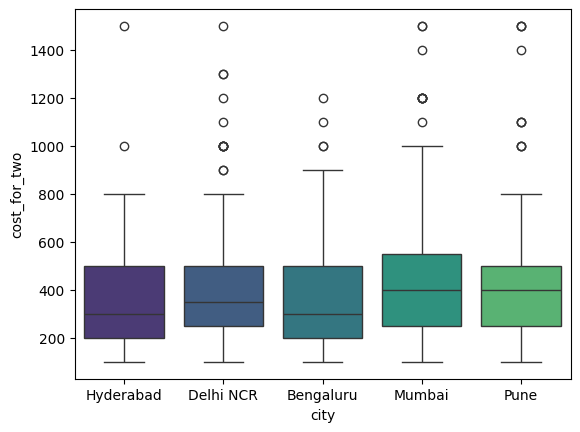

In [ ]:
sns.boxplot(x='city', y='cost_for_two',
            data = sample_df_wo_outlier, hue="city")
plt.show()

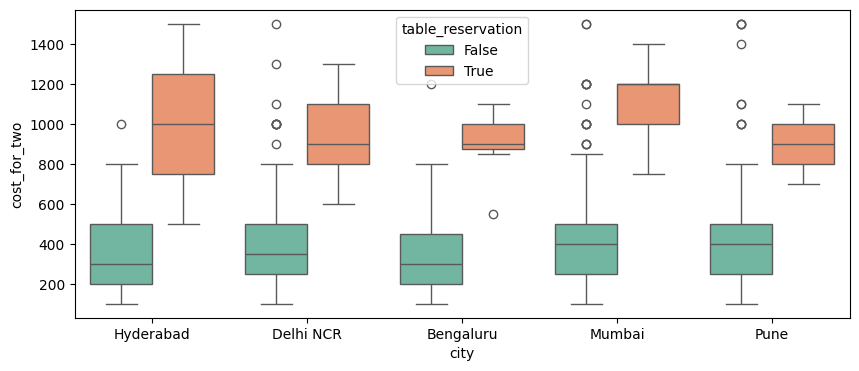

In [ ]:
# Lets see if table reservation makes a difference (optional)
plt.figure(figsize=(10, 4))
sns.boxplot(x='city', y='cost_for_two', hue = "table_reservation",
            data = sample_df_wo_outlier, palette="Set2")
plt.show() # should this even be considered a bivariate analysis?

### Case 3: Numerical vs. Numerical (Cost for Two vs. Ratings)

🔹 **Question:** Do expensive restaurants get higher ratings?

✅ **Best Plot:** Scatter Plot or Line Plot (if 1:1 between x and y like y = x^2)

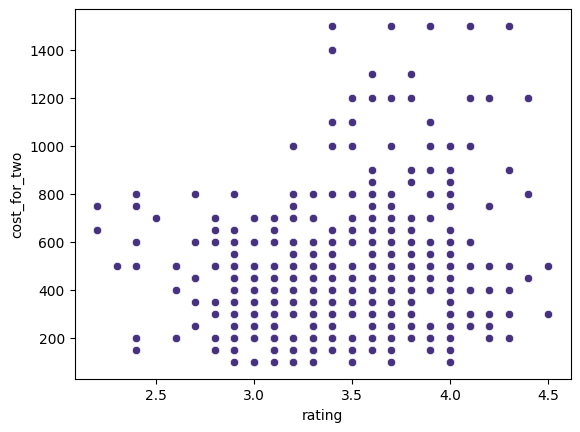

In [ ]:
sns.scatterplot(x='rating', y='cost_for_two', data = sample_df_wo_outlier)
plt.show()

In [ ]:
correlation = sample_df_wo_outlier[['cost_for_two', 'rating', "table_reservation"]].corr()
print(correlation)

                   cost_for_two    rating  table_reservation
cost_for_two           1.000000  0.174339           0.362819
rating                 0.174339  1.000000           0.218634
table_reservation      0.362819  0.218634           1.000000


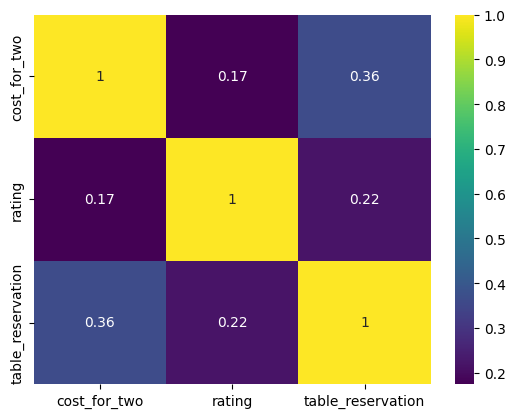

In [ ]:
sns.heatmap(correlation,annot=True,cmap="viridis")
plt.show()

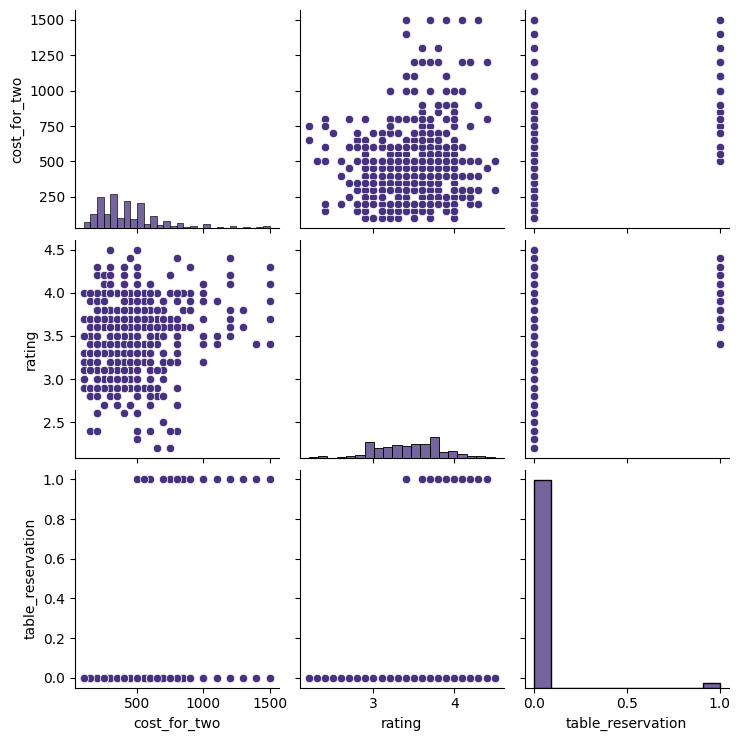

In [ ]:
sns.pairplot(sample_df_wo_outlier, vars = ['cost_for_two', 'rating', "table_reservation"])
plt.show()

### Extending the idea to Multivariate - go and try yourself :)

### Boilterplate code (to retrieve a subset from entire dataset)

Optional - Students may try understanding the code by themselves

In [ ]:
import os
import gdown

file_name = 'restaurants_all.csv'
file_path = os.path.join(os.getcwd(), file_name)

if not os.path.exists(file_path):
    url = "https://drive.google.com/uc?id=1qgMZdOpZ_KJAgqc46WW5pvG7xgkJ2jQ6"
    gdown.download(url, file_path, quiet=False)
    print(f"The file '{file_path}' has been downloaded.")
else:
    print(f"The file '{file_path}' already exists.")

The file '/content/restaurants_all.csv' already exists.


In [ ]:
import pandas as pd
df = pd.read_csv('restaurants_all.csv')

In [ ]:
df

,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
0,https://www.zomato.com/ncr/sainik-food-pandav-...,Sainik Food,Delhi NCR,Pandav Nagar,3.2,21.0,011 22486474 +91 9717806814,North Indian,300.0,"C 4/1, Opposite Mother Dairy, Pandav Nagar, Ne...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",False,False,False,NaN,77.284871,28.617732
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51.0,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500.0,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",False,False,False,Penne Pasta,73.184287,19.205887
2,https://www.zomato.com/ncr/brij-palace-restaur...,Brij Palace Restaurant,Delhi NCR,Jasola,NaN,NaN,+91 9891828106,North Indian,250.0,"4, Okhla Bus Stand, Jamia Nagar, Near, Jasola,...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",False,False,False,"Chana Masala , Butter Naan , Paneer Bhujia , D...",77.291223,28.563034
3,https://www.zomato.com/ncr/sahib-hotel-paharga...,Sahib Hotel,Delhi NCR,Paharganj,NaN,NaN,+91 9670005455,North Indian,300.0,"121, Amrit Kaur Market, Opposite New Delhi Rai...","{'Mon': [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1...",False,False,False,NaN,77.218298,28.642411
4,https://www.zomato.com/kolkata/chunkys-shibpur...,Chunky's,Kolkata,Shibpur,3.0,78.0,+91 8442828284,"Italian, Pizza, Continental",500.0,"523, G.T Road, Howrah., Shibpur, Howrah","{'Mon': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",True,False,False,NaN,88.330708,22.577758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224515,https://www.zomato.com/dharamshala/norling-res...,Norling Restaurant,Dharamshala,Mcleodganj,3.2,4.0,+91 7018442293,"Chinese, Tibetan",400.0,"Dolma Chowk, Jogiwara Road, Mcleodganj, Dharam...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1...",False,False,False,NaN,76.324329,32.237152
224516,https://www.zomato.com/dharamshala/hobo-expres...,HOBO Express,Dharamshala,Shyam Nagar,NaN,NaN,+91 7833904972,"North Indian, Fast Food",200.0,"Rakkar, Shyam Nagar, Dharamshala","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1,...",True,False,False,NaN,76.368021,32.200316
224517,https://www.zomato.com/dharamshala/kalimpong-r...,Kalimpong Restaurant,Dharamshala,Mcleodganj,3.2,5.0,+91 9816743703,Fast Food,NaN,"Tipa Road, Mc Leod Ganj, Mcleodganj, Dharamshala","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...",False,False,False,NaN,76.324371,32.238916
224518,https://www.zomato.com/dharamshala/street-cafe...,Street Cafe,Dharamshala,Mcleodganj,3.2,4.0,+91 7888487723,"Chinese, North Indian",600.0,"Bhagsu Naag, Mcleodganj, Dharamshala","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...",False,False,False,NaN,76.333211,32.243704


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   zomato_url         224520 non-null  object 
 1   name               224520 non-null  object 
 2   city               224520 non-null  object 
 3   area               224520 non-null  object 
 4   rating             144735 non-null  float64
 5   rating_count       142397 non-null  float64
 6   telephone          222930 non-null  object 
 7   cusine             223190 non-null  object 
 8   cost_for_two       220872 non-null  float64
 9   address            222734 non-null  object 
 10  timings            221556 non-null  object 
 11  online_order       224520 non-null  bool   
 12  table_reservation  224520 non-null  bool   
 13  delivery_only      224520 non-null  bool   
 14  famous_food        52526 non-null   object 
 15  longitude          224511 non-null  float64
 16  la

In [ ]:
top_cities = df['city'].value_counts().index[:5]  # Top 5 cities
print(top_cities)

Index(['Delhi NCR', 'Mumbai', 'Bengaluru', 'Pune', 'Hyderabad'], dtype='object', name='city')


In [ ]:
top_cuisines = df['cusine'].value_counts().index[:5]  # Top 5 cuisines
df['cusine_list'] = df['cusine'].apply(lambda x: x.split(',') if isinstance(x, str) else []) # str to list
cusine_exploded = df.explode('cusine_list') # explode the list (save each value as different row)
top_cusines = cusine_exploded["cusine_list"].value_counts().index[:10] # Top 10 cusines
print(top_cusines)

Index(['North Indian', ' Chinese', ' Fast Food', ' North Indian', 'Fast Food',
       'Chinese', ' Beverages', ' Desserts', 'South Indian', 'Bakery'],
      dtype='object', name='cusine_list')


In [ ]:
sample_df = cusine_exploded[cusine_exploded['city'].isin(top_cities)] # only limit dataset for top-5 cities to make clean plots
sample_df = sample_df[sample_df['cusine_list'].isin(top_cuisines)] # limit dataset to top-10 cuisines
sample_df = sample_df.sample(n=1000, random_state=42)